In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import glob
import subprocess

os.chdir("/Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code")
import functions_calculate_image_average_extract_coordinates as pipeline_functions


colors = {'Target':'tab:blue', 1:'tab:orange', 2:'tab:green', 3:'tab:red', 4:'tab:purple', 5:'tab:brown'}

def plot_dataset(images_path,reference_path,cam_type):
    cam_types = ['Mapir', 'Mapir', 'Stationary']
    if cam_type not in cam_types:
        raise ValueError("Invalid camera type. Expected one of: %s" % cam_types)

    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    images = images.sort_values(["flight", "image"], ascending = (True, True))
    images["order_all"] = list(range(1,len(images["file_name"]+1)))
    phantom_reflectance["file_name"] = phantom_reflectance["file_name"].str[:-4]
    images = pd.read_csv(images_path)
    images["file_name"] = images["file_name"].str[:-4]
    reference_target = pd.read_csv(images_path)
    reference_target = reference_target.sort_values(["flight"], ascending = (True))
    reference_target["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
    reference_target["flight"] = "Target"
    combined = pd.concat([reference_target,reference_target])
    combined = combined.reset_index()
    combined["date"] = combined.date.astype(str)
    combined["date"] = [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in combined["date"]]
    #{['Phantom':0, 'Mapir':1, 'Stationary':2]}
    
    #need to apply function to each type of camera and then plot at once
    combined.plot(x="date", y="mean_red", kind="scatter",c=combined['flight'].map(colors),title='Image Reflectance Per Flight', xlabel = "Time", ylabel = "Red Reflectance", ax=axis[{'Phantom':0, 'Mapir':1, 'Stationary':2}[cam_type]])

  

Work with Phantom Data:
Step 1: Extract image metadata and coordinates from Phantom Images and Calculate averages:
Step 2: Read in averages, Remove, file extension Sort images and create an overall order and plot change in reflectance over time/



In [2]:
phantom_path = '/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path)
    
Phantom_images = pd.read_csv(phantom_path + "image_mean_reflectance.csv")
Phantom_images = Phantom_images.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images["order_all"] = list(range(1,len(Phantom_images["file_name"])+1))
Phantom_images


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
997,0,2018_Oct_02_Phantom_Flight_1_16,1,16,2018:10:02 10:16:24,25.82,19.56,42.77,24.92,23.78,18.81,1
1003,0,2018_Oct_02_Phantom_Flight_1_17,1,17,2018:10:02 10:16:26,26.38,21.51,42.88,26.48,24.68,20.60,2
998,0,2018_Oct_02_Phantom_Flight_1_18,1,18,2018:10:02 10:16:30,24.76,19.22,40.97,24.50,23.12,18.10,3
1002,0,2018_Oct_02_Phantom_Flight_1_19,1,19,2018:10:02 10:16:31,24.91,19.43,41.17,24.90,22.96,17.81,4
1000,0,2018_Oct_02_Phantom_Flight_1_20,1,20,2018:10:02 10:16:34,25.82,19.70,42.53,25.27,23.43,17.90,5
...,...,...,...,...,...,...,...,...,...,...,...,...
992,0,2018_Oct_02_Phantom_Flight_5_346,5,346,2018:10:02 11:54:09,37.68,25.85,48.21,27.69,25.08,20.59,1992
993,0,2018_Oct_02_Phantom_Flight_5_347,5,347,2018:10:02 11:54:11,37.75,25.80,48.29,27.52,25.01,20.30,1993
994,0,2018_Oct_02_Phantom_Flight_5_348,5,348,2018:10:02 11:54:13,37.58,25.79,47.88,27.29,24.93,20.13,1994
995,0,2018_Oct_02_Phantom_Flight_5_349,5,349,2018:10:02 11:54:15,37.21,25.36,47.55,27.25,24.99,20.14,1995


Read in Phantom Reflectance Target Images

In [3]:
Phantom_Reflectance_path='/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path)
    

phantom_reflectance = pd.read_csv(Phantom_Reflectance_path + "image_mean_reflectance.csv")
phantom_reflectance = phantom_reflectance.sort_values(["flight"], ascending = (True))
phantom_reflectance["order_all"] = list(range(1,len(phantom_reflectance["file_name"])+1))
phantom_reflectance["flight"] = "Target"
phantom_reflectance


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,2018_Oct_2_Flight_1_Reflectance_Pre_1,Target,Pre,2018:10:02 10:14:35,63.15,60.80,61.80,62.53,49.45,65.17,1
1,0,2018_Oct_2_Flight_1_Reflectance_Pre_2,Target,Pre,2018:10:02 10:15:51,83.29,34.46,90.49,33.72,65.33,33.55,2
2,0,2018_Oct_2_Flight_2_Reflectance_Post_1,Target,Post,2018:10:02 10:51:08,77.47,48.60,85.53,51.26,58.55,46.79,3
3,0,2018_Oct_2_Flight_3_Reflectance_Pre_1,Target,Pre,2018:10:02 10:53:22,97.09,35.97,104.97,34.39,76.67,34.19,4
4,0,2018_Oct_2_Flight_2_Reflectance_Post_2,Target,Post,2018:10:02 10:51:10,83.85,53.39,85.05,54.72,55.41,51.60,5
5,0,2018_Oct_2_Flight_4_Reflectance_Post_1,Target,Post,2018:10:02 11:39:26,71.55,37.01,78.10,37.66,52.87,35.31,6
6,0,2018_Oct_2_Flight_3_Reflectance_Post_1,Target,Post,2018:10:02 11:10:44,124.09,55.50,131.91,57.75,95.00,53.89,7
8,0,2018_Oct_2_Flight_5_Reflectance_post_1,Target,post,2018:10:02 11:56:05,79.24,47.13,84.44,48.60,54.72,45.34,8
7,0,2018_Oct_2_Flight_4_reflectance_post_2,Target,post,2018:10:02 11:39:38,62.81,43.53,65.68,44.98,40.68,41.54,9


Combine Phantom Images with the reflectance target data

In [4]:

phantom = pd.concat([phantom_reflectance,Phantom_images])
phantom = phantom.reset_index()
phantom["date"] = phantom.date.astype(str)
phantom["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom["date"]]
phantom

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,0,2018_Oct_2_Flight_1_Reflectance_Pre_1,Target,Pre,2018-10-02 10:14:35,63.15,60.80,61.80,62.53,49.45,65.17,1
1,1,0,2018_Oct_2_Flight_1_Reflectance_Pre_2,Target,Pre,2018-10-02 10:15:51,83.29,34.46,90.49,33.72,65.33,33.55,2
2,2,0,2018_Oct_2_Flight_2_Reflectance_Post_1,Target,Post,2018-10-02 10:51:08,77.47,48.60,85.53,51.26,58.55,46.79,3
3,3,0,2018_Oct_2_Flight_3_Reflectance_Pre_1,Target,Pre,2018-10-02 10:53:22,97.09,35.97,104.97,34.39,76.67,34.19,4
4,4,0,2018_Oct_2_Flight_2_Reflectance_Post_2,Target,Post,2018-10-02 10:51:10,83.85,53.39,85.05,54.72,55.41,51.60,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,992,0,2018_Oct_02_Phantom_Flight_5_346,5,346,2018-10-02 11:54:09,37.68,25.85,48.21,27.69,25.08,20.59,1992
2001,993,0,2018_Oct_02_Phantom_Flight_5_347,5,347,2018-10-02 11:54:11,37.75,25.80,48.29,27.52,25.01,20.30,1993
2002,994,0,2018_Oct_02_Phantom_Flight_5_348,5,348,2018-10-02 11:54:13,37.58,25.79,47.88,27.29,24.93,20.13,1994
2003,995,0,2018_Oct_02_Phantom_Flight_5_349,5,349,2018-10-02 11:54:15,37.21,25.36,47.55,27.25,24.99,20.14,1995


Read in MAPIR Images, these are the images collected by MAPIR on the drone. Note that images are in two different folders from on Oct 2nd.
Remove, file extension
Sort images and create an overall order

In [5]:
MAPIR_1_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_1_3/"

if not os.path.exists(MAPIR_1_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_1_path)

Mapir_images_1_3 = pd.read_csv(MAPIR_1_path + "image_mean_reflectance.csv")

MAPIR_2_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_4_5/"

if not os.path.exists(MAPIR_2_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_2_path)

Mapir_images_4_5 = pd.read_csv(MAPIR_2_path + "image_mean_reflectance.csv")

Mapir_images = pd.concat([Mapir_images_1_3,Mapir_images_4_5])
Mapir_images = Mapir_images.reset_index()



Mapir_images = Mapir_images.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images["order_all"] = list(range(1,len(Mapir_images["file_name"])+1))
Mapir_images

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
450,450,0,2018_Oct_02_MAPIR_Flight_1_23,1,23,2018:10:02 07:29:14,33.65,11.47,38.33,13.60,32.00,11.24,1
451,451,0,2018_Oct_02_MAPIR_Flight_1_24,1,24,2018:10:02 07:29:10,30.54,10.64,34.74,12.54,28.99,10.40,2
452,452,0,2018_Oct_02_MAPIR_Flight_1_25,1,25,2018:10:02 07:29:06,30.32,10.32,34.56,12.18,28.70,10.07,3
453,453,0,2018_Oct_02_MAPIR_Flight_1_26,1,26,2018:10:02 07:29:02,30.20,10.09,34.44,11.95,28.54,9.90,4
454,454,0,2018_Oct_02_MAPIR_Flight_1_27,1,27,2018:10:02 07:28:58,29.63,9.99,33.76,11.84,28.00,9.89,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,325,0,2018_Oct_02_MAPIR_Flight_5_182,5,182,2018:10:02 08:54:45,14.82,4.54,16.50,5.43,13.52,4.50,964
964,326,0,2018_Oct_02_MAPIR_Flight_5_183,5,183,2018:10:02 08:54:49,15.25,4.73,16.97,5.66,14.00,4.63,965
965,327,0,2018_Oct_02_MAPIR_Flight_5_184,5,184,2018:10:02 08:54:53,14.98,4.76,16.66,5.67,13.76,4.66,966
966,328,0,2018_Oct_02_MAPIR_Flight_5_185,5,185,2018:10:02 08:54:57,14.81,4.61,16.48,5.47,13.56,4.54,967


Read in MAPAIR reflectance target images and concatinate into single dataframe


In [6]:
MAPIR_reflectance="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Mapir/Processed_2/"

if not os.path.exists(MAPIR_reflectance + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_reflectance)

Mapir_reflectance = pd.read_csv(MAPIR_reflectance + "image_mean_reflectance.csv")
Mapir_reflectance = Mapir_reflectance.sort_values(["flight", "image"], ascending = (True, True))
Mapir_reflectance["order_all"] = list(range(1,len(Mapir_reflectance["file_name"])+1))
Mapir_reflectance["flight"] = "Target"

Mapir = pd.concat([Mapir_reflectance,Mapir_images])
Mapir = Mapir.reset_index()
Mapir["date"] = Mapir.date.astype(str)
Mapir["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir["date"]]
Mapir

,level_0,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,index
0,0,0,2018_Oct_2_Flight_1_Reflectance_Post_2_A,Target,Post,2018-10-02 07:15:14,35.61,17.35,41.31,22.71,29.05,10.69,1,NaN
1,1,0,2018_Oct_2_Flight_1_Reflectance_Post_1_A,Target,Post,2018-10-02 07:15:18,36.55,14.34,42.26,18.50,29.67,9.65,2,NaN
2,2,0,2018_Oct_2_Flight_2_Reflectance_Post_1_A,Target,Post,2018-10-02 07:51:05,45.99,18.36,53.74,24.15,37.03,11.90,3,NaN
3,6,0,2018_Oct_2_Flight_2_Reflectance_Post_2_A,Target,Post,2018-10-02 07:51:01,46.50,13.93,54.16,17.11,36.49,10.67,4,NaN
4,8,0,2018_Oct_2_Flight_3_Reflectance_Post_2_A,Target,Post,2018-10-02 08:10:42,75.97,21.19,87.79,24.81,59.08,18.74,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,963,0,2018_Oct_02_MAPIR_Flight_5_182,5,182,2018-10-02 08:54:45,14.82,4.54,16.50,5.43,13.52,4.50,964,325.0
977,964,0,2018_Oct_02_MAPIR_Flight_5_183,5,183,2018-10-02 08:54:49,15.25,4.73,16.97,5.66,14.00,4.63,965,326.0
978,965,0,2018_Oct_02_MAPIR_Flight_5_184,5,184,2018-10-02 08:54:53,14.98,4.76,16.66,5.67,13.76,4.66,966,327.0
979,966,0,2018_Oct_02_MAPIR_Flight_5_185,5,185,2018-10-02 08:54:57,14.81,4.61,16.48,5.47,13.56,4.54,967,328.0


Read in Stationary Reflectance
*note october 2nd the folders are messed up so you have to use this special function

In [7]:
import PIL.Image
from PIL import ImageStat
from PIL.TiffTags import TAGS
import pandas as pd
from numpy import asarray
import os
import glob
import concurrent.futures
from datetime import datetime
from GPSPhoto import gpsphoto
from pandas.tseries.offsets import Nano




def calc_image_average_oct_special(path = False):
    paths = glob.glob(os.path.join(path, 'Group*/*'), recursive = False)
    with concurrent.futures.ThreadPoolExecutor() as executor:
        df_list = executor.map(pipeline_functions.proc_image_stationary, paths)
    
    df_list = list(df_list)
    df = pd.concat(list(df_list))
    print("Writing CSV with mean reflectance for {} images".format(len(df.file_name)))        
    df.to_csv(path + "image_mean_reflectance.csv")

Station_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Stationary_Reflectance/Processed_1/"

if not os.path.exists(Station_path + "image_mean_reflectance.csv"):    
    calc_image_average_oct_special(Station_path)

stationary_refectance = pd.read_csv(Station_path + "image_mean_reflectance.csv")


stationary_refectance = stationary_refectance.sort_values(["date"], ascending = (True))
stationary_refectance["order_all"] = list(range(1,len(stationary_refectance["file_name"])+1))

stationary_refectance["date"] = stationary_refectance.date.astype(str)
stationary_refectance["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in stationary_refectance["date"]]
stationary_refectance = stationary_refectance.loc[stationary_refectance["date"] > "2018-10-02 10:00:00"]
stationary_refectance["flight"] = 1
stationary_refectance["image"] = stationary_refectance["order_all"]

stationary_refectance

,Unnamed: 0,file_name,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,flight,image
8,0,2018_1002_100916_001,2018-10-02 10:09:17,16.15,14.95,25.66,27.00,9.92,7.41,9,1,9
9,0,2018_1002_100921_003,2018-10-02 10:09:22,15.40,14.51,24.33,26.41,9.64,7.20,10,1,10
12,0,2018_1002_101046_005,2018-10-02 10:10:47,13.64,13.20,21.58,23.42,8.34,6.53,11,1,11
10,0,2018_1002_101148_007,2018-10-02 10:11:49,15.81,15.33,25.21,27.63,9.66,7.57,12,1,12
11,0,2018_1002_101250_009,2018-10-02 10:12:51,14.01,13.57,22.20,24.50,8.64,6.83,13,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,2018_1002_115053_063,2018-10-02 11:50:54,19.32,18.45,29.84,32.04,11.80,8.58,97,1,97
97,0,2018_1002_115155_065,2018-10-02 11:51:56,19.51,18.66,30.12,32.38,11.89,8.67,98,1,98
98,0,2018_1002_115257_067,2018-10-02 11:52:58,20.78,19.84,32.02,34.36,12.64,9.19,99,1,99
99,0,2018_1002_115359_069,2018-10-02 11:54:00,20.00,19.19,30.76,33.17,12.16,8.89,100,1,100


Adjust Time Stamp values that were messed up due to cameras not being insync

Phantom = Correct
MAPIR = 3 Hours Early
Stationary = Correct


In [8]:
hours_added = dt.timedelta(hours = 3)
Mapir["date"] = Mapir["date"]+hours_added

/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/1544847333.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/1544847333.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/1544847333.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))


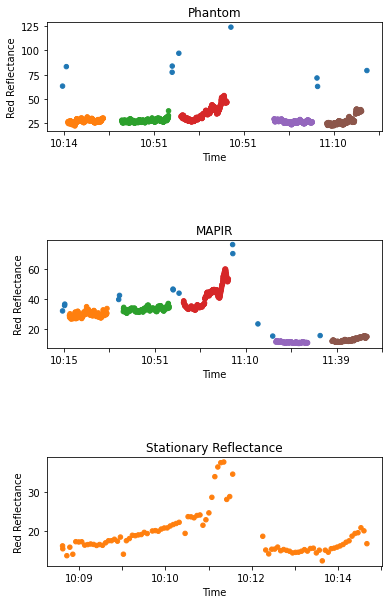

In [9]:

figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom.plot(x="date", y="mean_red", kind="scatter",c=phantom['flight'].map(colors),title='Phantom', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir.plot(x="date", y="mean_red", kind="scatter",c=Mapir['flight'].map(colors),title='MAPIR', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd.png', bbox_inches='tight')


#Next Images have to be normalized:

Step 1: identify normalization images. 
    for October 2nd. We use:
    Phantom: "2018_Oct_02_Phantom_Flight_1_48.JPG" 
    Mapir: destImage_rel="2018_Oct_02_MAPIR_Flight_1_18_A.tif" 
Step 2: 
    Normalize data using the following bash/python code




In [ ]:
#Phantom Images
sourceFolder = "2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom"
destImage_rel = "2018_Oct_02_Phantom_Flight_1_48.JPG"

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $sourceFolder -destImage $destImage -image @'


subprocess.call(command,shell=True)


In [ ]:
#Phantom Reflectance Tartget

sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom"
destImage_rel = "2018_Oct_02_Phantom_Flight_1_48.JPG"
reflectance_folder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom"


command = 'sourceFolder=' + sourceFolder + '; ' + 'reflectance_folder=' + reflectance_folder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${reflectance_folder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $reflectance_folder -destImage $destImage -image @ -reflectance_target "yes"'


subprocess.call(command,shell=True)



In [ ]:
#MAPIR Images
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_1_3"
destImage_rel="2018_Oct_02_MAPIR_Flight_1_23.JPG"

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $sourceFolder -destImage $destImage -image @'


subprocess.call(command,shell=True)

In [ ]:
#MAPIR Images second round
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_4_5"
destImage_rel="2018_Oct_02_MAPIR_Flight_4_19.JPG"


if not os.path.exists("/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/" + sourceFolder + "/output"):    
    mkdir_command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"' + '; mkdir "./output"'
    subprocess.call(mkdir_command,shell=True)

command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $sourceFolder -destImage $destImage -image @'


subprocess.call(command,shell=True)

In [ ]:
#MAPIR Reflectance Target
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_4_5"
destImage_rel="2018_Oct_02_MAPIR_Flight_1_18_A.tif"
reflectance_folder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Mapir/Processed_2/"

if not os.path.exists("/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/" + reflectance_folder + "/output"):    
    mkdir_command = 'sourceFolder=' + reflectance_folder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"' + '; mkdir "./output"'
    subprocess.call(mkdir_command,shell=True)

command = 'sourceFolder=' + sourceFolder + '; ' + 'reflectance_folder=' + reflectance_folder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${reflectance_folder}"; ' + 'destImage_rel=' + destImage_rel + '; ' + 'destImage="${sourceFolder}/${destImage_rel}"; ' + 'ls *.JPG | xargs -n 1 -P 9 -I @ python /Users/dlforrister/Documents_Mac/CODE_GIT_HUB_2017_Aug_31/YFDP_Photogrametry_Workflow_V2_2021_12_23/code/normalize_single_image.py -sourceFolder $reflectance_folder -destImage $destImage -image @ -reflectance_target "yes"'


subprocess.call(command,shell=True)

Now that all normalized images have been created, we need to add back in the exif data to the normalized images with Exif tools.

First add the phantom images back in

In [ ]:
#Phantom Images
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom"
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#Phantom Reflectance
sourceFolder='2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom/'
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#MAPIR Images
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_1_3"
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#MAPIR Images second round
sourceFolder="2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_4_5"
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#MAPIR Reflectance
sourceFolder='2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Mapir/Processed_2/'
command = 'sourceFolder=' + sourceFolder + '; ' + 'cd "/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/${sourceFolder}"; ' + '''add_exif() {
    image=$1; outputname="${image/.JPG/_HSV_V_fixed.JPG}"; output="./output/${outputname}"; eval "exiftool -q -q -overwrite_original_in_place -TagsFromFile ${image} $'-all:all>all:all' ${output}"
    }; ''' +  'export -f add_exif; ' + 'parallel -j8 add_exif {} ::: *.JPG'

subprocess.call(command,shell=True)

In [ ]:
#After images have been normalized. Here we create the same graph as above to see how well normalization worked


In [10]:
phantom_path = '/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Phantom/'

if not os.path.exists(phantom_path +"output/" "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(phantom_path,post_norm=True)
    
Phantom_images_post_norm = pd.read_csv(phantom_path + "output/" "image_mean_reflectance.csv")
Phantom_images_post_norm = Phantom_images_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Phantom_images_post_norm["order_all"] = list(range(1,len(Phantom_images_post_norm["file_name"])+1))

Phantom_images_post_norm


,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
48,0,2018_Oct_02_Phantom_Flight_1_16_HSV_V_fixed,1,16,2018:10:02 10:16:24,26.64,20.04,44.90,25.52,24.66,19.12,1
63,0,2018_Oct_02_Phantom_Flight_1_17_HSV_V_fixed,1,17,2018:10:02 10:16:26,26.53,20.59,43.96,25.06,24.96,19.71,2
78,0,2018_Oct_02_Phantom_Flight_1_18_HSV_V_fixed,1,18,2018:10:02 10:16:30,26.36,19.92,44.49,25.42,24.66,18.73,3
82,0,2018_Oct_02_Phantom_Flight_1_19_HSV_V_fixed,1,19,2018:10:02 10:16:31,25.69,19.43,43.29,24.70,23.82,17.84,4
94,0,2018_Oct_02_Phantom_Flight_1_20_HSV_V_fixed,1,20,2018:10:02 10:16:34,26.64,19.75,44.71,25.08,24.28,17.99,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1922,0,2018_Oct_02_Phantom_Flight_5_346_HSV_V_fixed,5,346,2018:10:02 11:54:09,33.99,23.08,44.15,24.67,22.64,18.42,1992
1924,0,2018_Oct_02_Phantom_Flight_5_347_HSV_V_fixed,5,347,2018:10:02 11:54:11,34.35,23.32,44.57,24.91,22.77,18.43,1993
1926,0,2018_Oct_02_Phantom_Flight_5_348_HSV_V_fixed,5,348,2018:10:02 11:54:13,34.47,23.77,44.54,25.20,22.90,18.64,1994
1923,0,2018_Oct_02_Phantom_Flight_5_349_HSV_V_fixed,5,349,2018:10:02 11:54:15,33.72,23.13,43.72,24.70,22.66,18.39,1995


In [11]:
Phantom_Reflectance_path='/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Phantom/'

if not os.path.exists(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(Phantom_Reflectance_path,post_norm=True)
    

phantom_reflectance_post_norm = pd.read_csv(Phantom_Reflectance_path +"output/"+ "image_mean_reflectance.csv")
phantom_reflectance_post_norm = phantom_reflectance_post_norm.sort_values(["flight"], ascending = (True))
phantom_reflectance_post_norm["order_all"] = list(range(1,len(phantom_reflectance_post_norm["file_name"])+1))
phantom_reflectance_post_norm["flight"] = "Target"
phantom_reflectance_post_norm




,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,2018_Oct_2_Flight_4_Reflectance_Post_1_HSV_V_f...,Target,Post,2018:10:02 11:39:26,71.27,37.05,77.98,37.64,52.64,35.18,1
1,0,2018_Oct_2_Flight_5_Reflectance_post_1_HSV_V_f...,Target,post,2018:10:02 11:56:05,79.00,47.15,84.25,48.58,54.52,45.21,2
2,0,2018_Oct_2_Flight_3_Reflectance_Post_1_HSV_V_f...,Target,Post,2018:10:02 11:10:44,123.82,55.55,131.74,57.73,94.63,53.87,3
3,0,2018_Oct_2_Flight_2_Reflectance_Post_2_HSV_V_f...,Target,Post,2018:10:02 10:51:10,83.61,53.39,84.81,54.72,55.23,51.53,4
4,0,2018_Oct_2_Flight_3_Reflectance_Pre_1_HSV_V_fixed,Target,Pre,2018:10:02 10:53:22,96.82,36.01,104.85,34.39,76.31,34.13,5
5,0,2018_Oct_2_Flight_2_Reflectance_Post_1_HSV_V_f...,Target,Post,2018:10:02 10:51:08,77.20,48.62,85.38,51.25,58.36,46.67,6
6,0,2018_Oct_2_Flight_1_Reflectance_Pre_1_HSV_V_fixed,Target,Pre,2018:10:02 10:14:35,62.89,60.72,61.53,62.48,49.22,65.21,7
8,0,2018_Oct_2_Flight_1_Reflectance_Pre_2_HSV_V_fixed,Target,Pre,2018:10:02 10:15:51,83.02,34.50,90.38,33.69,65.04,33.43,8
7,0,2018_Oct_2_Flight_4_reflectance_post_2_HSV_V_f...,Target,post,2018:10:02 11:39:38,62.57,43.54,65.49,44.96,40.57,41.44,9


In [30]:
phantom_post_norm = pd.concat([phantom_reflectance_post_norm,Phantom_images_post_norm])
phantom_post_norm = phantom_post_norm.reset_index()
phantom_post_norm["date"] = phantom_post_norm.date.astype(str)
phantom_post_norm["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in phantom_post_norm["date"]]


phantom_post_norm["GCC"] = phantom_post_norm["mean_green"]/(phantom_post_norm["mean_red"]+phantom_post_norm["mean_green"]+phantom_post_norm["mean_blue"])
phantom_post_norm

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,GCC
0,0,0,2018_Oct_2_Flight_4_Reflectance_Post_1_HSV_V_f...,Target,Post,2018-10-02 11:39:26,71.27,37.05,77.98,37.64,52.64,35.18,1,0.386250
1,1,0,2018_Oct_2_Flight_5_Reflectance_post_1_HSV_V_f...,Target,post,2018-10-02 11:56:05,79.00,47.15,84.25,48.58,54.52,45.21,2,0.386876
2,2,0,2018_Oct_2_Flight_3_Reflectance_Post_1_HSV_V_f...,Target,Post,2018-10-02 11:10:44,123.82,55.55,131.74,57.73,94.63,53.87,3,0.376196
3,3,0,2018_Oct_2_Flight_2_Reflectance_Post_2_HSV_V_f...,Target,Post,2018-10-02 10:51:10,83.61,53.39,84.81,54.72,55.23,51.53,4,0.379209
4,4,0,2018_Oct_2_Flight_3_Reflectance_Pre_1_HSV_V_fixed,Target,Pre,2018-10-02 10:53:22,96.82,36.01,104.85,34.39,76.31,34.13,5,0.377185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,1922,0,2018_Oct_02_Phantom_Flight_5_346_HSV_V_fixed,5,346,2018-10-02 11:54:09,33.99,23.08,44.15,24.67,22.64,18.42,1992,0.438083
2001,1924,0,2018_Oct_02_Phantom_Flight_5_347_HSV_V_fixed,5,347,2018-10-02 11:54:11,34.35,23.32,44.57,24.91,22.77,18.43,1993,0.438293
2002,1926,0,2018_Oct_02_Phantom_Flight_5_348_HSV_V_fixed,5,348,2018-10-02 11:54:13,34.47,23.77,44.54,25.20,22.90,18.64,1994,0.437052
2003,1923,0,2018_Oct_02_Phantom_Flight_5_349_HSV_V_fixed,5,349,2018-10-02 11:54:15,33.72,23.13,43.72,24.70,22.66,18.39,1995,0.436763


In [12]:
MAPIR_1_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_1_3/"

if not os.path.exists(MAPIR_1_path + "output/" + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_1_path,post_norm=True)

Mapir_images_1_3_post_norm = pd.read_csv(MAPIR_1_path + "output/" + "image_mean_reflectance.csv")

MAPIR_2_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Camera_Settings_Flights_4_5/"

if not os.path.exists(MAPIR_2_path + "output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_2_path,post_norm=True)

Mapir_images_4_5_post_norm = pd.read_csv(MAPIR_2_path + "output/" + "image_mean_reflectance.csv")

Mapir_images_post_norm = pd.concat([Mapir_images_1_3_post_norm,Mapir_images_4_5_post_norm])
Mapir_images_post_norm = Mapir_images_post_norm.reset_index()


Mapir_images_post_norm = Mapir_images_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images_post_norm["order_all"] = list(range(1,len(Mapir_images_post_norm["file_name"])+1))

Mapir_images_post_norm

,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
111,111,0,2018_Oct_02_MAPIR_Flight_1_23_HSV_V_fixed,1,23,2018:10:02 07:29:14,62.11,26.45,71.46,31.13,59.11,25.77,1
110,110,0,2018_Oct_02_MAPIR_Flight_1_24_HSV_V_fixed,1,24,2018:10:02 07:29:10,61.97,26.42,71.20,30.88,58.82,25.65,2
112,112,0,2018_Oct_02_MAPIR_Flight_1_25_HSV_V_fixed,1,25,2018:10:02 07:29:06,61.93,25.82,71.41,30.23,58.56,25.08,3
113,113,0,2018_Oct_02_MAPIR_Flight_1_26_HSV_V_fixed,1,26,2018:10:02 07:29:02,62.60,26.30,72.17,30.87,59.15,25.56,4
114,114,0,2018_Oct_02_MAPIR_Flight_1_27_HSV_V_fixed,1,27,2018:10:02 07:28:58,62.99,26.28,72.52,30.90,59.50,25.75,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,248,0,2018_Oct_02_MAPIR_Flight_5_182_HSV_V_fixed,5,182,2018:10:02 08:54:45,74.04,25.59,82.85,30.27,67.30,25.15,964
883,245,0,2018_Oct_02_MAPIR_Flight_5_183_HSV_V_fixed,5,183,2018:10:02 08:54:49,73.59,26.05,82.50,30.86,67.39,25.34,965
885,247,0,2018_Oct_02_MAPIR_Flight_5_184_HSV_V_fixed,5,184,2018:10:02 08:54:53,75.06,26.34,83.92,30.98,68.69,25.59,966
881,243,0,2018_Oct_02_MAPIR_Flight_5_185_HSV_V_fixed,5,185,2018:10:02 08:54:57,74.07,25.63,82.91,30.09,67.61,25.01,967


In [13]:
MAPIR_reflectance_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/Reflectance/Mapir/Processed_2/"

if not os.path.exists(MAPIR_reflectance_path +"output/"+ "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_reflectance_path,post_norm=True)

Mapir_reflectance_post_norm = pd.read_csv(MAPIR_reflectance_path +"output/"+ "image_mean_reflectance.csv")
Mapir_reflectance_post_norm = Mapir_reflectance_post_norm.sort_values(["flight", "image"], ascending = (True, True))
Mapir_reflectance_post_norm["order_all"] = list(range(1,len(Mapir_reflectance_post_norm["file_name"])+1))
Mapir_reflectance_post_norm["flight"] = "Target"

Mapir_reflectance_post_norm

,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
0,0,2018_Oct_2_Flight_1_Reflectance_Post_1_A_HSV_V...,Target,Post,2018:10:02 07:15:18,36.16,14.34,42.19,18.53,29.34,9.73,1
2,0,2018_Oct_2_Flight_2_Reflectance_Post_2_A_HSV_V...,Target,Post,2018:10:02 07:51:01,46.12,13.95,54.11,17.13,36.19,10.73,2
4,0,2018_Oct_2_Flight_2_Reflectance_Post_1_A_HSV_V...,Target,Post,2018:10:02 07:51:05,45.59,18.36,53.68,24.17,36.69,11.97,3
5,0,2018_Oct_2_Flight_1_Reflectance_Post_2_A_HSV_V...,Target,Post,2018:10:02 07:15:14,35.23,17.34,41.26,22.73,28.72,10.75,4
7,0,2018_Oct_2_Flight_3_Reflectance_Post_2_A_HSV_V...,Target,Post,2018:10:02 08:10:42,75.61,21.17,87.76,24.80,58.76,18.75,5
8,0,2018_Oct_2_Flight_3_Reflectance_Post_1_A_HSV_V...,Target,Post,2018:10:02 08:10:46,69.64,32.80,79.51,35.83,55.70,25.38,6
9,0,2018_Oct_2_Flight_4_Reflectance_Post_A_HSV_V_f...,Target,Post,2018:10:02 08:39:35,15.48,4.88,18.02,6.10,11.74,3.57,7
1,0,2018_Oct_2_Flight_2_Reflectance_Pre_1_A_HSV_V_...,Target,Pre,2018:10:02 07:33:06,39.22,16.29,45.42,21.07,31.63,10.78,8
3,0,2018_Oct_2_Flight_2_Reflectance_Pre_2_A_HSV_V_...,Target,Pre,2018:10:02 07:33:22,41.95,12.25,49.05,15.07,33.29,9.55,9
6,0,2018_Oct_2_Flight_1_Reflectance_Pre_A_HSV_V_fixed,Target,Pre,2018:10:02 07:14:34,31.69,25.14,37.26,33.17,22.98,13.28,10


In [18]:
Mapir_post_norm = pd.concat([Mapir_reflectance_post_norm,Mapir_images_post_norm])
Mapir_post_norm = Mapir_post_norm.reset_index()
Mapir_post_norm["date"] = Mapir_post_norm.date.astype(str)
Mapir_post_norm["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir_post_norm["date"]]
Mapir_post_norm

,level_0,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,index
0,0,0,2018_Oct_2_Flight_1_Reflectance_Post_1_A_HSV_V...,Target,Post,2018-10-02 07:15:18,36.16,14.34,42.19,18.53,29.34,9.73,1,NaN
1,2,0,2018_Oct_2_Flight_2_Reflectance_Post_2_A_HSV_V...,Target,Post,2018-10-02 07:51:01,46.12,13.95,54.11,17.13,36.19,10.73,2,NaN
2,4,0,2018_Oct_2_Flight_2_Reflectance_Post_1_A_HSV_V...,Target,Post,2018-10-02 07:51:05,45.59,18.36,53.68,24.17,36.69,11.97,3,NaN
3,5,0,2018_Oct_2_Flight_1_Reflectance_Post_2_A_HSV_V...,Target,Post,2018-10-02 07:15:14,35.23,17.34,41.26,22.73,28.72,10.75,4,NaN
4,7,0,2018_Oct_2_Flight_3_Reflectance_Post_2_A_HSV_V...,Target,Post,2018-10-02 08:10:42,75.61,21.17,87.76,24.80,58.76,18.75,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,886,0,2018_Oct_02_MAPIR_Flight_5_182_HSV_V_fixed,5,182,2018-10-02 08:54:45,74.04,25.59,82.85,30.27,67.30,25.15,964,248.0
977,883,0,2018_Oct_02_MAPIR_Flight_5_183_HSV_V_fixed,5,183,2018-10-02 08:54:49,73.59,26.05,82.50,30.86,67.39,25.34,965,245.0
978,885,0,2018_Oct_02_MAPIR_Flight_5_184_HSV_V_fixed,5,184,2018-10-02 08:54:53,75.06,26.34,83.92,30.98,68.69,25.59,966,247.0
979,881,0,2018_Oct_02_MAPIR_Flight_5_185_HSV_V_fixed,5,185,2018-10-02 08:54:57,74.07,25.63,82.91,30.09,67.61,25.01,967,243.0


In [22]:
#MAPIR Calibrated

MAPIR_1_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_1_3/Calibrated_1/"

if not os.path.exists(MAPIR_1_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_1_path)

Mapir_images_1_3_calibrated = pd.read_csv(MAPIR_1_path + "image_mean_reflectance.csv")

MAPIR_2_path="/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/MAPIR/Processed_1/Camera_Settings_Flights_4_5/Calibrated_1/"

if not os.path.exists(MAPIR_2_path + "image_mean_reflectance.csv"):    
    pipeline_functions.calc_image_average(MAPIR_2_path)

Mapir_images_4_5_calibrated = pd.read_csv(MAPIR_2_path + "image_mean_reflectance.csv")

Mapir_images_calibrated = pd.concat([Mapir_images_1_3_calibrated,Mapir_images_4_5_calibrated])
Mapir_images_calibrated = Mapir_images_calibrated.reset_index()


Mapir_images_calibrated = Mapir_images_calibrated.sort_values(["flight", "image"], ascending = (True, True))
Mapir_images_calibrated["order_all"] = list(range(1,len(Mapir_images_calibrated["file_name"])+1))

Mapir_images_calibrated



,index,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all
82,82,0,2018_Oct_02_MAPIR_Flight_1_1_A_CALIBRATED,1,1,2018:10:02 07:24:06,25.19,9.79,22.65,9.20,47.68,18.37,1
122,122,0,2018_Oct_02_MAPIR_Flight_1_2_A_CALIBRATED,1,2,2018:10:02 07:24:02,25.77,10.45,23.15,9.80,48.90,19.82,2
132,132,0,2018_Oct_02_MAPIR_Flight_1_3_A_CALIBRATED,1,3,2018:10:02 07:23:58,26.50,10.35,23.88,9.71,50.38,19.68,3
142,142,0,2018_Oct_02_MAPIR_Flight_1_4_A_CALIBRATED,1,4,2018:10:02 07:23:54,26.04,10.34,23.45,9.71,49.60,19.69,4
152,152,0,2018_Oct_02_MAPIR_Flight_1_5_A_CALIBRATED,1,5,2018:10:02 07:23:50,25.16,9.59,22.62,8.94,47.84,18.11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,292,0,2018_Oct_02_MAPIR_Flight_5_182_A_CALIBRATED,5,182,2018:10:02 08:54:45,20.32,6.45,18.61,6.16,40.47,12.89,1028
945,291,0,2018_Oct_02_MAPIR_Flight_5_183_A_CALIBRATED,5,183,2018:10:02 08:54:49,20.92,6.72,19.13,6.43,41.84,13.31,1029
948,294,0,2018_Oct_02_MAPIR_Flight_5_184_A_CALIBRATED,5,184,2018:10:02 08:54:53,20.54,6.77,18.78,6.44,41.11,13.42,1030
947,293,0,2018_Oct_02_MAPIR_Flight_5_185_A_CALIBRATED,5,185,2018:10:02 08:54:57,20.29,6.54,18.58,6.21,40.55,13.04,1031


In [28]:


Mapir_calibrated = pd.concat([Mapir_reflectance,Mapir_images_calibrated])
Mapir_calibrated = Mapir_calibrated.reset_index()
Mapir_calibrated["date"] = Mapir_calibrated.date.astype(str)
Mapir_calibrated["date"]= [dt.datetime.strptime(d,"%Y:%m:%d %H:%M:%S") for d in Mapir_calibrated["date"]]

Mapir_calibrated["NDVI"] = (Mapir_calibrated["mean_blue"]-Mapir_calibrated["mean_red"])/(Mapir_calibrated["mean_blue"]+ Mapir_calibrated["mean_red"])

Mapir_calibrated

,level_0,Unnamed: 0,file_name,flight,image,date,mean_red,sd_red,mean_green,sd_green,mean_blue,sd_blue,order_all,index,NDVI
0,0,0,2018_Oct_2_Flight_1_Reflectance_Post_2_A,Target,Post,2018-10-02 07:15:14,35.61,17.35,41.31,22.71,29.05,10.69,1,NaN,-0.101454
1,1,0,2018_Oct_2_Flight_1_Reflectance_Post_1_A,Target,Post,2018-10-02 07:15:18,36.55,14.34,42.26,18.50,29.67,9.65,2,NaN,-0.103896
2,2,0,2018_Oct_2_Flight_2_Reflectance_Post_1_A,Target,Post,2018-10-02 07:51:05,45.99,18.36,53.74,24.15,37.03,11.90,3,NaN,-0.107926
3,6,0,2018_Oct_2_Flight_2_Reflectance_Post_2_A,Target,Post,2018-10-02 07:51:01,46.50,13.93,54.16,17.11,36.49,10.67,4,NaN,-0.120617
4,8,0,2018_Oct_2_Flight_3_Reflectance_Post_2_A,Target,Post,2018-10-02 08:10:42,75.97,21.19,87.79,24.81,59.08,18.74,5,NaN,-0.125065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,946,0,2018_Oct_02_MAPIR_Flight_5_182_A_CALIBRATED,5,182,2018-10-02 08:54:45,20.32,6.45,18.61,6.16,40.47,12.89,1028,292.0,0.331469
1041,945,0,2018_Oct_02_MAPIR_Flight_5_183_A_CALIBRATED,5,183,2018-10-02 08:54:49,20.92,6.72,19.13,6.43,41.84,13.31,1029,291.0,0.333333
1042,948,0,2018_Oct_02_MAPIR_Flight_5_184_A_CALIBRATED,5,184,2018-10-02 08:54:53,20.54,6.77,18.78,6.44,41.11,13.42,1030,294.0,0.333658
1043,947,0,2018_Oct_02_MAPIR_Flight_5_185_A_CALIBRATED,5,185,2018-10-02 08:54:57,20.29,6.54,18.58,6.21,40.55,13.04,1031,293.0,0.333005


/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/4222877973.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/4222877973.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/4222877973.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))


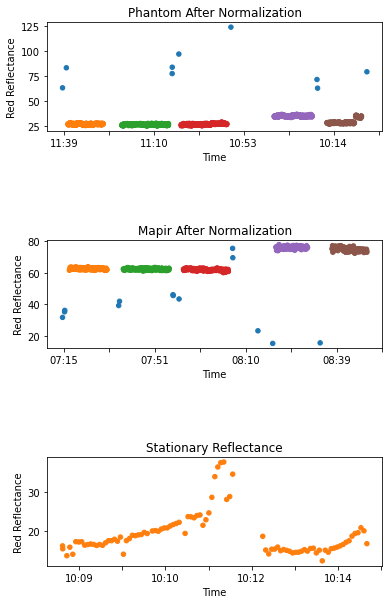

In [26]:
figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="mean_red", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_post_norm.plot(x="date", y="mean_red", kind="scatter",c=Mapir_post_norm['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_post_norm.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization.png', bbox_inches='tight')


/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/3151726997.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/3151726997.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
/var/folders/8c/hd4bm34x1cbcxnhknvp3bn_80000gn/T/ipykernel_43272/3151726997.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))


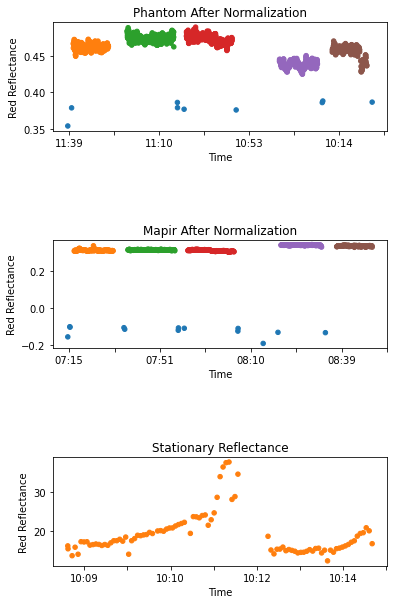

In [31]:
figure, axis = plt.subplots(3, 1)

# Phantom Data
ax_1 = phantom_post_norm.plot(x="date", y="GCC", kind="scatter",c=phantom_post_norm['flight'].map(colors),title='Phantom After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[0])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_1 = ['']*len(phantom_post_norm.index)
# Every 4th ticklable shows the month and day
ticklabels_1[::2] = [item.strftime('%H:%M') for item in phantom_post_norm.date[::2]]
ax_1.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_1))



# Mapir Data
ax_2 = Mapir_calibrated.plot(x="date", y="NDVI", kind="scatter",c=Mapir_calibrated['flight'].map(colors),title='Mapir After Normalization', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[1])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_2 = ['']*len(Mapir_calibrated.index)
# Every 4th ticklable shows the month and day
ticklabels_2[::2] = [item.strftime('%H:%M') for item in Mapir_calibrated.date[::2]]
ax_2.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_2))
  
# stationary_refectance
ax_3 = stationary_refectance.plot(x="date", y="mean_red", kind="scatter",c=stationary_refectance['flight'].map(colors),title='Stationary Reflectance', xlabel = "Time", ylabel = "Red Reflectance",ax=axis[2])
# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels_3 = ['']*len(stationary_refectance.index)
# Every 4th ticklable shows the month and day
ticklabels_3[::2] = [item.strftime('%H:%M') for item in stationary_refectance.date[::2]]
ax_3.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels_3))



plt.subplots_adjust(hspace = 1)



figure.patch.set_facecolor('white')
figure.set_figheight(10)
plt.savefig('/Volumes/GoogleDrive/My Drive/2018_Yasuni_Drone_Mapping/2_2018_Oct/2018_Oct_2_V2/Proccessed_Images/1_Raw_Reflectance_Oct_2nd_post_normalization_calibration.png', bbox_inches='tight')